## Executive Summary

The purpose of this data exploration was to look into survival rates among passengers aboard the Titanic. With this data set we were able to so a deep dive into the factors that may have contributed to having a higher likelihood of survival. Things like: class, port departure, sex, family size, and fare paid to board the ship are all represented in this dataset which allowed us to isolate various factors and examine if there was relationship between those factors and survival. 

It was a relatively clean dataset but there were some things that needed to be adjusted and those are shown in the work below.


### Contents:
#### Data Analysis and Calculations:
- [2018 Data Import and Cleaning](#Data-Import-&-Cleaning)
- [Feature Extraction](#Feature-Extraction)
- [What was the survival rate overall?](#Calculate-the-Survival-Rate)
- [Which gender fared the worst? What was their survival rate?](#Which-Gender-Fared-Worse)
- [What was the survival rate for each Pclass?](#Survival-Rate-By-Class)
- [Did any reverends survive? How many?](#Did-the-Reverends-Survive)
- [What is the survival rate for cabins marked IDK](#Survival-rate-for-those-without-a-cabin-listed)
- [What is the survival rate for people whose Age is empty?](#Survival-rate-for-those-without-an-Age)
- [What is the survival rate for each port of embarkation?](#Survival-rate-for-each-Port-of-Embarkation)
- [What is the survival rate for children (under 12) in each Pclass?](#Survival-Rate-for-Children-Under-12-Broken-Out-by-Class)
- [Did the captain of the ship survive? Is he on the list?](#Captain-Edward-Crosby-did-not-Survive-the-Crash)
- [Of all the people that died, who had the most expensive ticket? How much did it cost?](#Our-Most-Expensive-Ticket-Buyers)
- [Does having family on the boat help or hurt your chances of survival?](#Family-Count-and-Survival-Rate)

#### Plotting:
- [Visualizing our Data](#Visualizing-the-Data)
- [Heatmap of Correlation Coefficients](#Heatmap)
- [Survival Rate By Class](#Survival-Rate-By-Class)
- [Survival Rate By Age](#Survival-Rate-By-Age)
- [Survival Rate and Ticket Price](#Survival-Rate-and-Ticket-Price)
- [What type of travelers left from each Port](#What-type-of-travelers-left-from-each-Port)
- [Which port of departure had the highest survival rate?](#Which-port-of-departure-had-the-highest-survival-rate?)
- [Did Family Size change Survival Rate?](#Did-Family-Size-change-Survival-Rate?)
- [2nd Class Passengers Survived at an 80% rate with large families!](#2nd-Class-Passengers-Survived-at-an-80%-rate-with-large-families!)
- [90% of women in 1st and 2nd Class Lived](#90%-of-women-in-1st-and-2nd-Class-Lived)

#### Conclusions:
- [Conclusions](#Conclusions)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Import & Cleaning

In [2]:
# Importing the date frame called train
train = pd.read_csv('/Users/pwalesdi/Downloads/train.csv')

In [3]:
train.sort_values("Embarked", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S


In [4]:
# Data has 891 Rows and 12 Columns
train.shape

(891, 12)

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [7]:
#train.drop(axis=0, index=1)
#df.drop(index=
train.loc[train["Embarked"] == ""]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
train.count()['Age']

714

In [9]:
train['Cabin'].value_counts(dropna=False).head()

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
Name: Cabin, dtype: int64

This shows that there are 687 values in the cabin variable column that are coded as "NaN' or missing. This is the most in the dataset

In [10]:
columns = train.columns

In [11]:
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
[train.count()[col] for col in columns]

[891, 891, 891, 891, 891, 714, 891, 891, 891, 891, 204, 889]

In [13]:
values = [train.count()[col] for col in columns]

In [14]:
[col for col in train.columns]

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [15]:
labels = [col for col in train.columns]

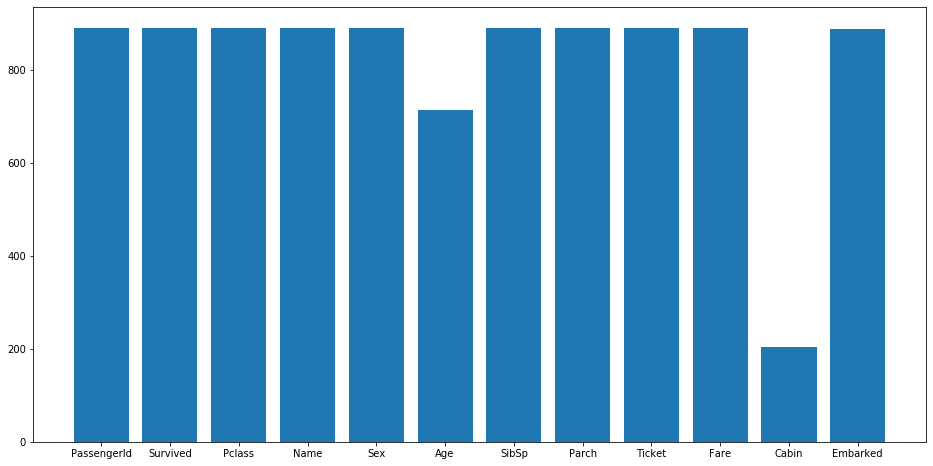

In [16]:
plt.figure(figsize=(16, 8))

plt.bar(labels, values);

In [17]:
train.loc[train['Embarked'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
train = train.loc[train['Embarked'].notnull()]

In [19]:
true_ages = train.loc[train['Age'].notnull()]

In [20]:
true_ages

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [21]:
train.shape

(889, 12)

In [22]:
loc = train.loc[train['Cabin'].isnull()]

In [23]:
type(loc)

pandas.core.frame.DataFrame

In [24]:
train.loc[train['Cabin'].isnull() ,'Cabin'] = "¯\(ツ)/¯"

### Feature Extraction

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C


In [26]:
# Add column to DF called FamilyCount which is the sum of the Sibling Countr variable and parent count variable
train['FamilyCount'] = train['SibSp'] + train['Parch']

In [27]:
train['FamilyCount'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: FamilyCount, dtype: int64

In [28]:
# Adding column called 'IsReverend'
train['IsReverend'] = ""

In [29]:
train[train['Name'].str.contains('Rev.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,


In [30]:
train.loc[train['Name'].str.contains('Rev.') , 'IsReverend'] = '1'

In [31]:
train[train['Name'].str.contains('Rev.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1


In [32]:
train[~train['Name'].str.contains('Rev.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,


In [33]:
train.loc[~train['Name'].str.contains('Rev.') , 'IsReverend'] = '0'

In [34]:
train[~train['Name'].str.contains('Rev.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,0


In [35]:
train['Embarked_C'] = 0
train['Embarked_Q'] = 0
train['Embarked_S'] = 0

In [36]:
train.loc[train['Embarked'].str.contains('C')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,¯\(ツ)/¯,C,1,0,0,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,¯\(ツ)/¯,C,0,0,0,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,¯\(ツ)/¯,C,0,0,0,0,0
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.00,0,0,PC 17601,27.7208,¯\(ツ)/¯,C,0,0,0,0,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,0,0,0,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.00,1,0,PC 17604,82.1708,¯\(ツ)/¯,C,1,0,0,0,0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,¯\(ツ)/¯,C,0,0,0,0,0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,¯\(ツ)/¯,C,1,0,0,0,0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,¯\(ツ)/¯,C,0,0,0,0,0


In [37]:
train.loc[train['Embarked'].str.contains('C') , 'Embarked_C'] = 1
train.loc[train['Embarked'].str.contains('Q') , 'Embarked_Q'] = 1
train.loc[train['Embarked'].str.contains('S') , 'Embarked_S'] = 1
# train.loc[train['Embarked'].str.contains('Q') , ('Embarked_C', 'Embarked_S')] = '0'
# train.loc[train['Embarked'].str.contains('S') , ('Embarked_Q', 'Embarked_C')] = '0'
# train.loc[train['Embarked'].str.contains('C') , ('Embarked_S', 'Embarked_Q')] = '0'


In [38]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,0,1,0,0


In [39]:
train.loc[train['Sex'].isnull() ,'Sex'] = ""

In [40]:
train.loc[~train['Sex'].str.contains('f') , 'Sex'] = '0'
train.loc[train['Sex'].str.contains('f') , 'Sex'] = '1'


In [41]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,0,1,0,0


### Calculate the Survival Rate

In [42]:
# Calculate the survival rate
train.groupby('Survived').agg(['count', 'mean'])


PassengerId             Pclass             Age            SibSp  \
               count        mean  count      mean count       mean count   
Survived                                                                   
0                549  447.016393    549  2.531876   424  30.626179   549   
1                340  444.358824    340  1.955882   288  28.193299   340   

                   Parch            Fare            FamilyCount            \
              mean count      mean count       mean       count      mean   
Survived                                                                    
0         0.553734   549  0.329690   549  22.117887         549  0.883424   
1         0.476471   340  0.467647   340  48.209498         340  0.944118   

         Embarked_C           Embarked_Q           Embarked_S            
              count      mean      count      mean      count      mean  
Survived                                                                 
0               549  0.136612        549  0.085610        549  0.777778  
1               340  0.273529        340  0.088235        340  0.638235

In [43]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilyCount      int64
IsReverend      object
Embarked_C       int64
Embarked_Q       int64
Embarked_S       int64
dtype: object

In [44]:
train['Survived'].mean()

0.38245219347581555

In [45]:
train['Sex'] = train['Sex'].astype("int")
train['IsReverend'] = train['IsReverend'].astype("int")
train['Embarked_C'] = train['Embarked_C'].astype("int")
train['Embarked_Q'] = train['Embarked_Q'].astype("int")
train['Embarked_S'] = train['Embarked_S'].astype("int")



### Which Gender Fared Worse

In [46]:
# This shows the percentage of women (Sex = 1) that survived. In this case it's 74.03 percent
train.loc[(train['Sex'] == 1)].mean()

PassengerId    430.932692
Survived         0.740385
Pclass           2.166667
Sex              1.000000
Age             27.745174
SibSp            0.698718
Parch            0.653846
Fare            44.252124
FamilyCount      1.352564
IsReverend       0.000000
Embarked_C       0.233974
Embarked_Q       0.115385
Embarked_S       0.650641
dtype: float64

In [47]:
# This shows the percentage of mean (Sex = 0) that survived. In this case it's 18.9 percent
train.loc[(train['Sex'] == 0)].mean()

PassengerId    454.147314
Survived         0.188908
Pclass           2.389948
Sex              0.000000
Age             30.726645
SibSp            0.429809
Parch            0.235702
Fare            25.523893
FamilyCount      0.665511
IsReverend       0.010399
Embarked_C       0.164645
Embarked_Q       0.071057
Embarked_S       0.764298
dtype: float64

### Survival Rate By Class

In [48]:
# Survival rate by class: 1st class survived at a rate of 62.6%, 2nd = 47.3%, 3rd = 24.2%
train.groupby('Pclass')['Survived'].agg(['mean'])

,mean
Pclass,
1,0.626168
2,0.472826
3,0.242363


### Did the Reverends Survive

In [49]:
# Survival Rate for reverends is Zero
train.groupby('IsReverend')['Survived'].agg(['mean', 'count'])

,mean,count
IsReverend,,
0,0.385051,883
1,0.000000,6


In [50]:
train.sort_values(['IsReverend'], ascending = False).head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
626,627,0,2,"Kirkland, Rev. Charles Leonard",0,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1,0,1,0
848,849,0,2,"Harper, Rev. John",0,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1,0,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",0,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1,0,0,1
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",0,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1,0,0,1
150,151,0,2,"Bateman, Rev. Robert James",0,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1,0,0,1
589,590,0,3,"Murdlin, Mr. Joseph",0,NaN,0,0,A./5. 3235,8.050,¯\(ツ)/¯,S,0,0,0,0,1


### Survival rate for those without a cabin listed

In [51]:
# The survival rate for the ¯\(ツ)/¯ cabin was ~ 30.0%
# train.groupby('Cabin')['Survived'].agg(['mean'])
train.loc[train['Cabin'] == '¯\(ツ)/¯'].groupby('Cabin')['Survived'].agg(['mean'])

,mean
Cabin,
¯\(ツ)/¯,0.299854


### Survival rate for those without an Age

In [52]:
no_age = train.loc[train["Age"].isnull()]

In [53]:
no_age.agg('mean')

PassengerId    435.581921
Survived         0.293785
Pclass           2.598870
Sex              0.299435
Age                   NaN
SibSp            0.564972
Parch            0.180791
Fare            22.158567
FamilyCount      0.745763
IsReverend       0.000000
Embarked_C       0.214689
Embarked_Q       0.276836
Embarked_S       0.508475
dtype: float64

### Survival rate for each Port of Embarkation

In [54]:
print(train.groupby('Embarked')['Survived'].agg(['mean']))
# print(train.groupby('Embarked_S')['Survived'].agg(['mean', 'count']))
# print(train.groupby('Embarked_Q')['Survived'].agg(['mean', 'count']))
# print(train.groupby('Embarked_C')['Survived'].agg(['mean', 'count']))

              mean
Embarked          
C         0.553571
Q         0.389610
S         0.336957


### Survival Rate for Children Under 12 Broken Out by Class

In [55]:
children = train.loc[(train["Age"] < 12)]

In [56]:
children.groupby('Pclass')['Survived'].agg(['mean'])

,mean
Pclass,
1,0.750000
2,1.000000
3,0.404255


### Our Most Expensive Ticket Buyers

In [57]:
# Tells us the Miss. Anna Ward, Mr. Gustave Lesurer and Mr. Thomas Drake Martinez Cardeza purchased the most expensive
# ticket(s) and they survived. 
survived = train.loc[(train["Survived"] == 1)]
survived.sort_values(['Fare'], ascending = False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,C,0,0,1,0,0
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,¯\(ツ)/¯,C,0,0,1,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,1,0,0
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0,0,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0,0,1


In [58]:
# Mr. Charles & Mark Fortune had the most expensive ticket of those who died, paying $263.00
not_survived = train.loc[(train["Survived"] == 0)]
not_survived.sort_values(['Fare'], ascending = False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0,0,1
438,439,0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0000,C23 C25 C27,S,5,0,0,0,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,0,1,0,0
557,558,0,1,"Robbins, Mr. Victor",0,NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,C,0,0,1,0,0
527,528,0,1,"Farthing, Mr. John",0,NaN,0,0,PC 17483,221.7792,C95,S,0,0,0,0,1


### Captain Edward Crosby did not Survive the Crash

In [59]:
# The captain is on the list and he did not survive
train.loc[train['Name'].str.contains('Cap')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1


### Family Count and Survival Rate

In [60]:
# It appears that having a family is beneficial by an increasing rate until you have more than 4 family membes and 
# then the likelihood of survival decreases. However the sample size is low with families < 3 so it is hard to 
# determine if it is statistically significant.
train.groupby('FamilyCount')['Survived'].agg(['mean', 'count'])

,mean,count
FamilyCount,,
0,0.300935,535
1,0.552795,161
2,0.578431,102
3,0.724138,29
4,0.200000,15
5,0.136364,22
6,0.333333,12
7,0.000000,6
10,0.000000,7


In [61]:
train['Class_1'] = 0
train['Class_2'] = 0
train['Class_3'] = 0
train.loc[train['Pclass'] == 1 , 'Class_1'] = 1
train.loc[train['Pclass'] == 2 , 'Class_2'] = 1
train.loc[train['Pclass'] == 3 , 'Class_3'] = 1


# Visualizing the Data

## Heatmap

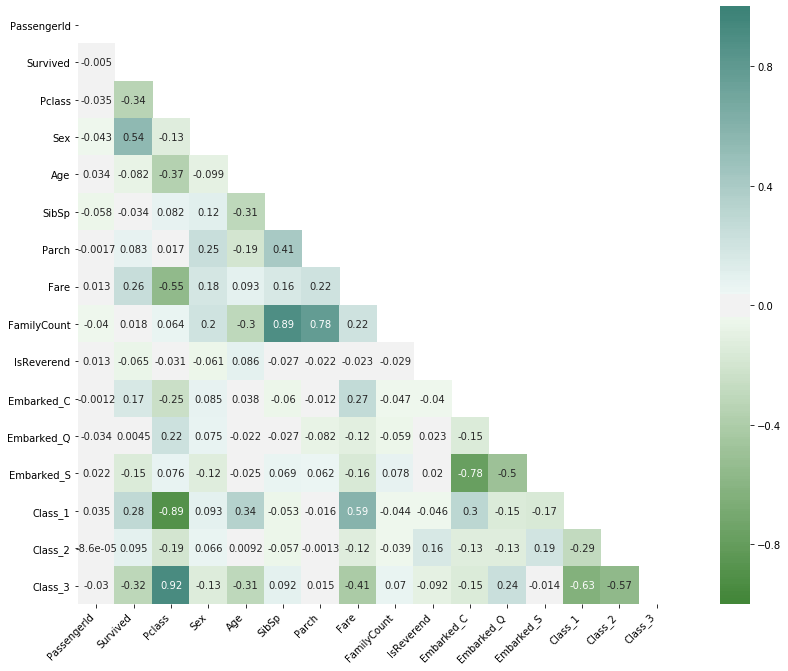

In [62]:
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(16, 11))

corr = train.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.title("", fontsize=15);


ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(125, 175, n=200),
    mask = mask,
    square=True,
    annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Survival Rate By Class

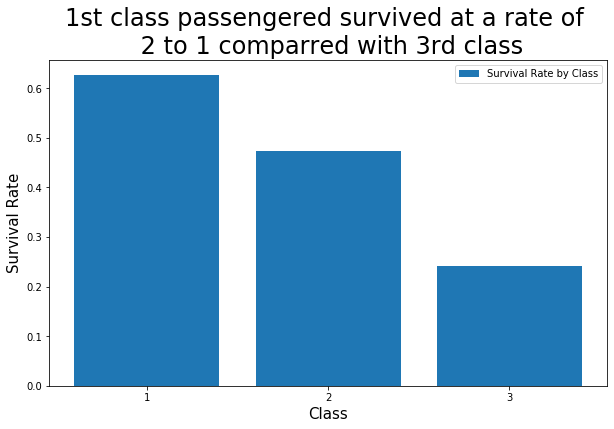

In [63]:
train.Pclass.sort_values().unique()
train.groupby('Pclass').Survived.mean()
plt.figure(figsize = (10,6))
plt.bar(train.Pclass.sort_values().unique(), train.groupby('Pclass').Survived.mean());
plt.title("1st class passengered survived at a rate of \n 2 to 1 comparred with 3rd class", fontsize=24)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Survival Rate', fontsize = 15)
plt.xticks(list(range(1,4,1)));
plt.legend(['Survival Rate by Class']);

## Survival Rate By Age

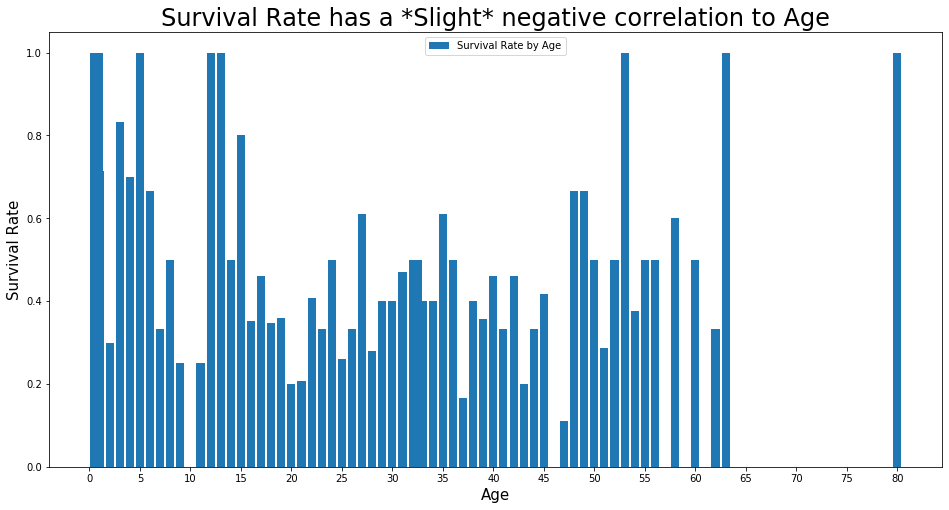

In [64]:
true_ages = train.loc[train['Age'].notnull()]
Ages = true_ages.Age.sort_values().unique()
train.groupby('Age').Survived.mean()
plt.figure(figsize = (16,8))
plt.bar(Ages, train.groupby('Age').Survived.mean());
plt.title("Survival Rate has a *Slight* negative correlation to Age", fontsize=24)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Survival Rate', fontsize = 15)
plt.xticks(list(range(0,81,5)));
plt.legend(['Survival Rate by Age']);

## Survival Rate and Ticket Price

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


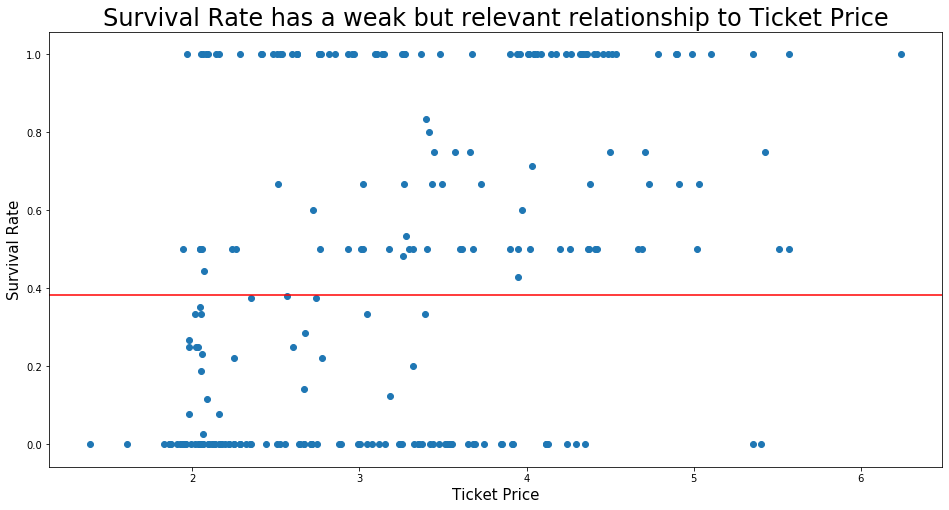

In [65]:
Fares = train.Fare.sort_values().unique()
plt.figure(figsize = (16,8))
plt.scatter(np.log(Fares), train.groupby('Fare').Survived.mean());
plt.title("Survival Rate has a weak but relevant relationship to Ticket Price", fontsize=24)
plt.axhline(train.Survived.mean(), color='red')
plt.xlabel('Ticket Price', fontsize = 15)
plt.ylabel('Survival Rate', fontsize = 15);

## What type of travelers left from each Port

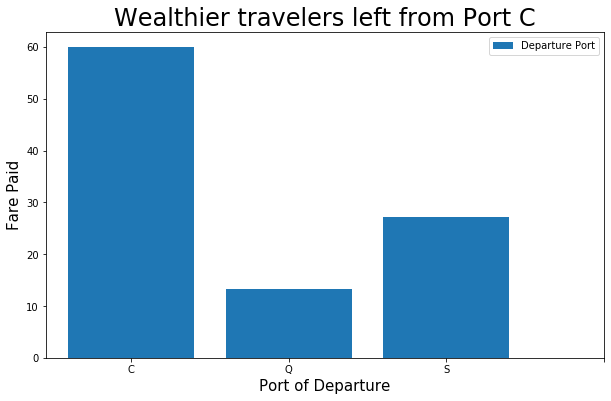

In [66]:
em = train.Embarked.sort_values().unique()
em_fares = train.groupby('Embarked')['Fare'].mean()
plt.figure(figsize = (10,6))
plt.bar(em, em_fares);
plt.title("Wealthier travelers left from Port C", fontsize=24)
plt.xlabel('Port of Departure', fontsize = 15)
plt.ylabel('Fare Paid', fontsize = 15)
plt.xticks(list(range(0,4,1)));
plt.legend(['Departure Port']);

## Which port of departure had the highest survival rate?

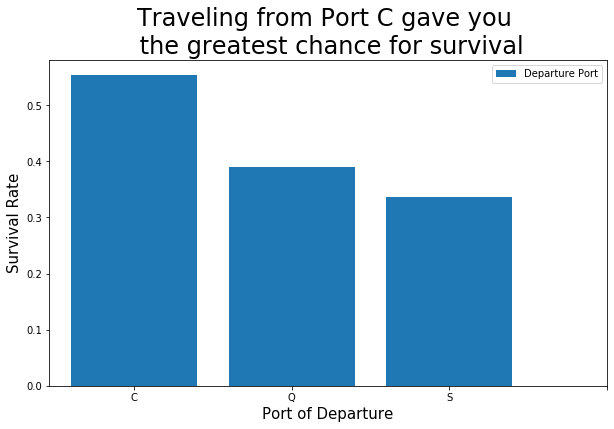

In [67]:
em = train.Embarked.sort_values().unique()
em_lived = train.groupby('Embarked')['Survived'].mean()
plt.figure(figsize = (10,6))
plt.bar(em, em_lived);
plt.title("Traveling from Port C gave you \n the greatest chance for survival", fontsize=24)
plt.xlabel('Port of Departure', fontsize = 15)
plt.ylabel('Survival Rate', fontsize = 15)
plt.xticks(list(range(0,4,1)));
plt.legend(['Departure Port']);

## Did Family Size change Survival Rate?

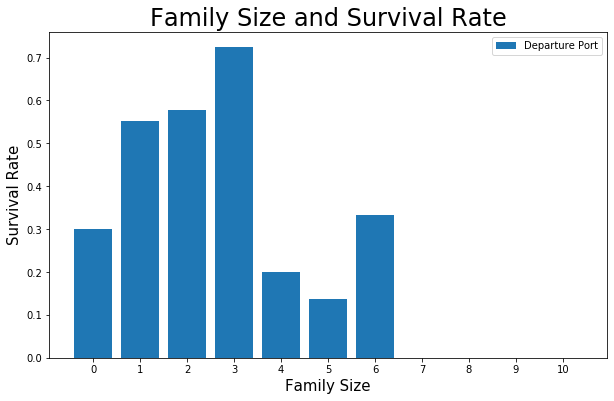

In [68]:
family = train.groupby('FamilyCount')['Survived'].agg(['mean', 'count'])
plt.figure(figsize = (10,6))
plt.bar(train.FamilyCount.sort_values().unique(), family['mean']);
plt.title("Family Size and Survival Rate", fontsize=24)
plt.xlabel('Family Size', fontsize = 15)
plt.ylabel('Survival Rate', fontsize = 15)
plt.xticks(list(range(0,11,1)));
plt.legend(['Departure Port']);

## 2nd Class Passengers Survived at an 80% rate with large families!

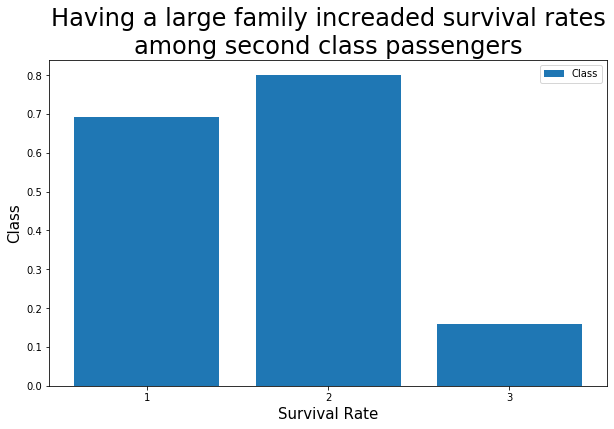

In [69]:
big_families = train.loc[(train["FamilyCount"] >= 3)]
big_families.groupby('Pclass')['Survived'].agg(['mean', 'count'])
plt.figure(figsize = (10,6))
plt.bar(big_families.Pclass.sort_values().unique(), big_families.groupby('Pclass')['Survived'].mean());
plt.title("Having a large family increaded survival rates\namong second class passengers", fontsize=24)
plt.xlabel('Survival Rate', fontsize = 15)
plt.ylabel('Class', fontsize = 15)
plt.xticks(list(range(1,4,1)));
plt.legend(['Class']);

## 90% of women in 1st and 2nd Class Lived

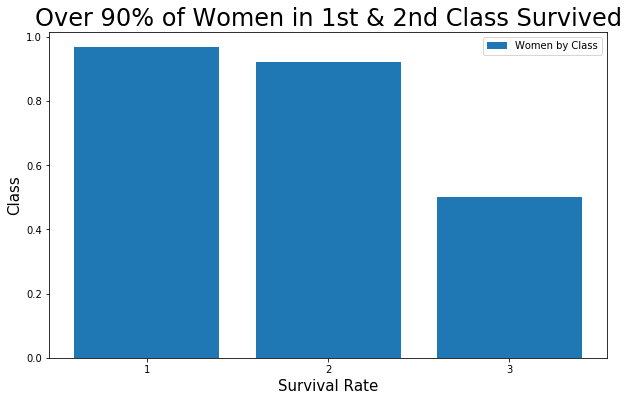

In [70]:
women = train.loc[(train["Sex"] == 1)]
women.groupby('Pclass')['Survived'].agg(['mean', 'count'])
plt.figure(figsize = (10,6))
plt.bar(women.Pclass.sort_values().unique(), women.groupby('Pclass')['Survived'].mean());
plt.title("Over 90% of Women in 1st & 2nd Class Survived", fontsize=24)
plt.xlabel('Survival Rate', fontsize = 15)
plt.ylabel('Class', fontsize = 15)
plt.xticks(list(range(1,4,1)));
plt.legend(['Women by Class']);

## Conclusions

There are a few things that seem to be driving the survival rate of this dataset. The first is gender. Women survived at a much higher rate than men. Almost 3 in 4 women survived while fewer than 1 in 5 men survived. The second major driver of survival was being in 1st or 2nd class. Being a 1st or 2nd class female passenger resulted in a survival rate of over 90%. If you were in 2nd class, having a family helped your survival rate as it seems like the people on the ship were keen to save children. Port of departure appeared to drive survival rate a bit, with a departure from port C having a higher survival rate, however, your port of departure was also highly correlated with the class of the ticket you purchased so it seems like the class of ticket is explaining that much more than the port.

Overall, being a woman or wealth resulted in your greatest chance of survival, and having children would also help.